In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
#reading the dataset
df = pd.read_csv('zomato.csv')
dataset = df.copy()

In [ ]:
# getting insights of the data
df.head()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
# deleting unnecessary data
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-null object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [8]:
# rate feature
df['rate'].value_counts()


NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.0 /5       7
2.2 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [9]:
df['rate'].isnull().sum()

7775

In [10]:
# Removing '/5' from rate column
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])

In [11]:
# renaming features 
df = df.rename(columns = {"approx_cost(for two people)" : "avg_cost", "listed_in(type)" : "meal_type", 
                   "listed_in(city)" : "city"})

In [12]:
df['city'].value_counts()


BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Whitefield               1620
Residency Road           1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: city, dtype: int64

In [13]:
df['location'].value_counts()


BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [14]:
df['city'].isnull().sum()


0

In [15]:
df['location'].isnull().sum()

21

In [16]:
# It seems that city attribute is better than location attribute 

del df['location']


In [17]:
# checking null values
df.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
rest_type         227
dish_liked      28078
cuisines           45
avg_cost          346
meal_type           0
city                0
dtype: int64

In [18]:
# Number of cities we have
len(df['city'].value_counts())

30

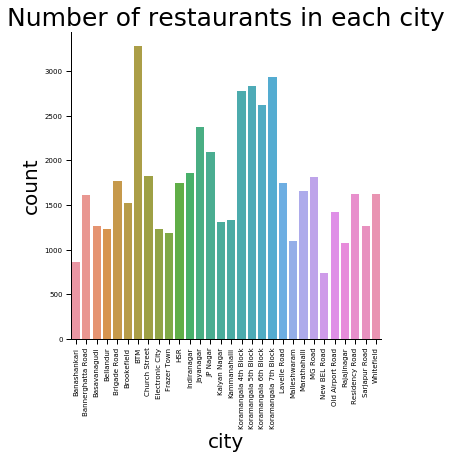

In [61]:
# plotting number of restaurants in each city
sns.set_context("paper", font_scale = 0.8, rc={"font.size": 5,"axes.titlesize": 25,"axes.labelsize": 20,"figsize":11.7})   
b = sns.catplot(data = df, kind = 'count', x = 'city')
plt.title('Number of restaurants in each city')
b.set_xticklabels(rotation = 90)
plt.show()

In [54]:
# tuning rate feature, converting '-' and 'NEW' to unrated
a = list(df['rate'])
for i in range(0, len(a)):
    if a[i] == 'nan':
        a[i] = 'unrated'
    elif a[i] == '-':
        a[i] = 'unrated'
    elif a[i] == 'NEW':
        a[i] = 'unrated'
        

In [24]:
df['rate'] = a

In [25]:
df['rate'].value_counts()

unrated    10052
3.9         2098
3.8         2022
3.7         2011
3.9         1874
           ...  
2.0            7
2.2            7
2.0            4
1.8            3
1.8            2
Name: rate, Length: 63, dtype: int64

In [26]:
a = list(df['rate'])
for i in range(0, len(a)):
    if a[i] == 'unrated':
        a[i] = None
    else :
        a[i] = float(a[i])
df['rate'] = a

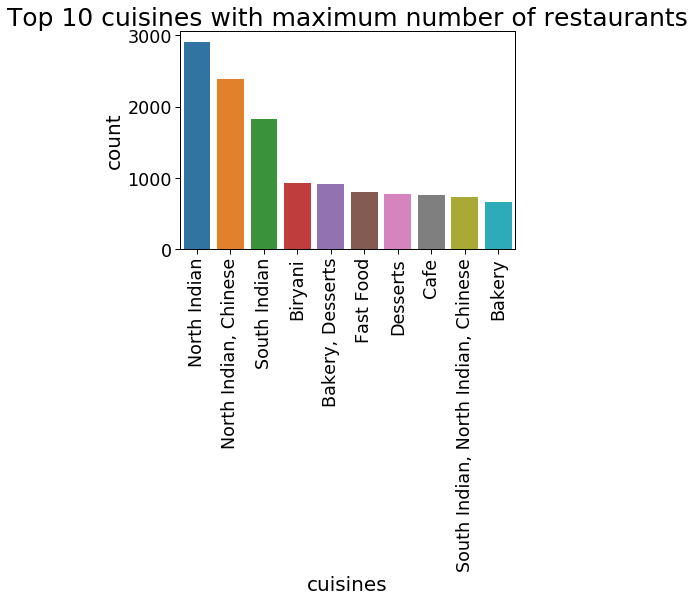

In [32]:
# This is done to see the competition

# count plot of cuisines
b = sns.countplot(data = df, x = 'cuisines', order = df.cuisines.value_counts().iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Top 10 cuisines with maximum number of restaurants')
plt.show()

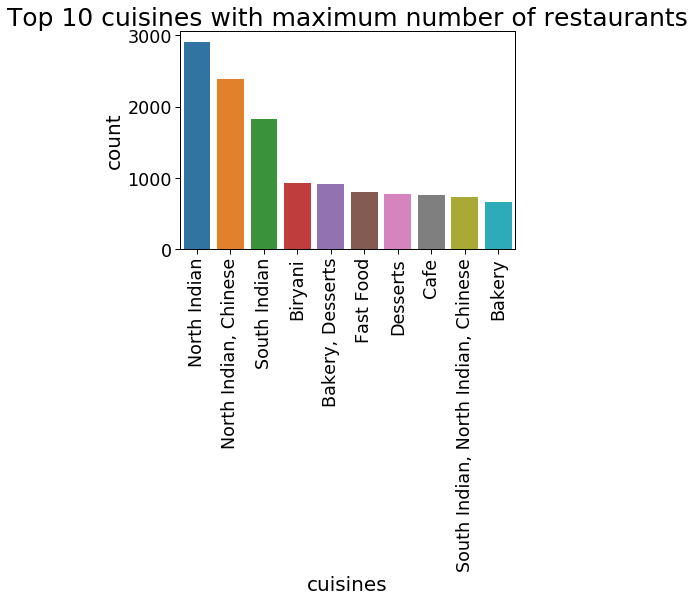

In [33]:
# count plot of top 10 cuisines
b = sns.countplot(data = df, x = 'cuisines', order = df.cuisines.value_counts().head(10).iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Top 10 cuisines with maximum number of restaurants')
plt.show()

In [64]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [98]:
dataset=pd.read_csv("zomato.csv")

In [99]:
dataset.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# Removing '/5' from rate column
dataset['rate'] = dataset['rate'].apply(lambda x: str(x).split('/')[0])

In [4]:
# deleting unnecessary data
del dataset['url']
del dataset['address']
del dataset['phone']

del dataset['menu_item']

In [5]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [6]:
dataset.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [107]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [9]:
dataset['id'] = dataset.index

In [10]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),id
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,2
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,4


In [11]:
del dataset['dish_liked']

In [12]:
del dataset['cuisines']

In [13]:
# renaming features 
dataset = dataset.rename(columns = {"approx_cost(for two people)" : "avg_cost", "listed_in(type)" : "meal_type", 
                   "listed_in(city)" : "city"})

In [14]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,avg_cost,reviews_list,meal_type,city,id
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,2
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,4


In [15]:
del dataset['meal_type']

In [16]:
del dataset['name']

In [17]:
import nltk
import string
from nltk import word_tokenize
from nltk.util import bigrams, trigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

In [20]:
NLTK_STOPWORDS = set(stopwords.words('english'))

#Removing digits in text
def remove_numbers_in_string(s):
      
    return s.translate(string.digits)
#Lower case Conversion
def lowercase_remove_punctuation(s):
    print (s)
    s = s.lower()
    s = s.translate(string.punctuation)
    return s

#Remove StopWords  
def remove_stopwords(s):
    token_list = nltk.word_tokenize(s)
    exclude_stopwords = lambda token : token not in NLTK_STOPWORDS
    return ' '.join(filter(exclude_stopwords, token_list))

#Stemming

def stem_token_list(token_list):
    STEMMER = PorterStemmer()
    return [STEMMER.stem(tok) for tok in token_list]

def restring_tokens(token_list):
    return ' '.join(token_list)

def preprocessing(s):
    s = remove_numbers_in_string(s)
    s = lowercase_remove_punctuation(s)
    s = remove_stopwords(s)
    token_list = nltk.word_tokenize(s)
    token_list = stem_token_list(token_list)
    return restring_tokens(token_list)

In [29]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
dataset['reviews_list'] = dataset['reviews_list'].apply(clean_text)
dataset['reviews_list'] = dataset['reviews_list'].str.replace('\d+', '')

In [30]:
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,rated ratedn beautiful place dine inthe inter...,[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,rated ratedn dinner family turned good choose...,[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,rated ratedn ambience good enough pocket frie...,[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,rated ratedn great food proper karnataka styl...,[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,rated ratedn good restaurant neighbourhood bu...,[],Buffet,Banashankari


In [34]:
lex_file = open("AFINN-111.csv")

In [35]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) - line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])

In [39]:
#Normalization
def normalize(s):
    for p in string.punctuation:
        s = s.replace(p, '')
 
    return s.lower().strip()

In [40]:
#Strip the records and create a word list for each tweet
word_list = []
for idx in range(dataset.shape[0]):
    text=dataset.reviews_list[idx]
    text=normalize(text)
    words = []
    token_list = nltk.word_tokenize(text)
    #print(tokens)
    for token in token_list:
        words.append(token.lower())
    word_list.append(words)  

In [41]:
strength = []
for tweet in word_list:
    score = 0
    for word in tweet:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)


In [43]:
# Removing '/5' from rate column
dataset['rate'] = dataset['rate'].apply(lambda x: str(x).split('/')[0])

In [60]:
dataset['vote_rank']=dataset.rate*dataset.votes

In [61]:
dataset["Rank"] = dataset["vote_rank"].rank(method ='average') 

In [62]:
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),vote_rank,Rank
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,rated ratedn beautiful place dine inthe inter...,[],Buffet,Banashankari,3177.5,36982.5
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,rated ratedn dinner family turned good choose...,[],Buffet,Banashankari,3226.7,37087.5
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,rated ratedn ambience good enough pocket frie...,[],Buffet,Banashankari,3488.4,37423.5
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,rated ratedn great food proper karnataka styl...,[],Buffet,Banashankari,325.6,22356.5
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,rated ratedn good restaurant neighbourhood bu...,[],Buffet,Banashankari,630.8,27395.5


In [59]:
dataset.rate = pd.to_numeric(dataset['rate'])

In [53]:
dataset.dt

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
vote_rank                       object
Rank                           float64
dtype: object

In [55]:
# tuning rate feature, converting '-' and 'NEW' to unrated
a = list(dataset['rate'])
for i in range(0, len(a)):
    if a[i] == 'nan':
        a[i] = 'unrated'
    elif a[i] == '-':
        a[i] = 'unrated'
    elif a[i] == 'NEW':
        a[i] = 'unrated'
        

In [56]:
dataset['rate']=a

In [58]:
a = list(dataset['rate'])
for i in range(0, len(a)):
    if a[i] == 'unrated':
        a[i] = None
    else :
        a[i] = float(a[i])
dataset['rate'] = a

In [64]:
strength=np.array(strength)

In [65]:
df_strength=pd.DataFrame(strength)

In [68]:
dataset['Strength']=df_strength[0]

In [69]:
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),vote_rank,Rank,Strength
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,rated ratedn beautiful place dine inthe inter...,[],Buffet,Banashankari,3177.5,36982.5,95
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,rated ratedn dinner family turned good choose...,[],Buffet,Banashankari,3226.7,37087.5,98
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,rated ratedn ambience good enough pocket frie...,[],Buffet,Banashankari,3488.4,37423.5,124
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,rated ratedn great food proper karnataka styl...,[],Buffet,Banashankari,325.6,22356.5,158
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,rated ratedn good restaurant neighbourhood bu...,[],Buffet,Banashankari,630.8,27395.5,18


In [72]:
dataset.corr()

,rate,votes,Rank,Strength
rate,1.000000,0.434040,0.668320,0.336398
votes,0.434040,1.000000,0.529352,0.515032
Rank,0.668320,0.529352,1.000000,0.374232
Strength,0.336398,0.515032,0.374232,1.000000


In [71]:
del dataset['vote_rank']

In [73]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [76]:
data=dataset[['Rank', 'votes', 'Strength','rate']]

In [84]:
data.describe()

,Rank,votes,Strength,rate
count,41665.000000,41665.000000,41665.000000,41665.000000
mean,20833.000000,351.653018,217.021913,3.700449
std,12027.760887,881.800960,572.475971,0.440513
min,10.000000,0.000000,-966.000000,1.800000
25%,10409.500000,21.000000,10.000000,3.400000
50%,20823.500000,73.000000,30.000000,3.700000
75%,31251.500000,276.000000,104.000000,4.000000
max,41664.000000,16832.000000,13510.000000,4.900000


In [78]:
data.dropna(inplace = True) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
X = np.array(data['Strength']).reshape(-1, 1) 
y = np.array(data['Rank']).reshape(-1, 1) 
  
#data.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.14612530276182512


In [90]:
X = data[['Strength', 'votes','rate']].values
y = data['Rank'].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.521176967273939


In [87]:
data.to_csv("rank.csv")

In [4]:
rank_data=pd.read_csv("rank.csv")

In [89]:
rank_data.describe()

,votes,Strength,rate,Rank
count,41665.000000,41665.000000,41665.000000,41665.000000
mean,351.653018,217.021913,3.700449,20808.881243
std,881.800960,572.475971,0.440513,12000.784605
min,0.000000,-966.000000,1.800000,1.000000
25%,21.000000,10.000000,3.400000,10409.000000
50%,73.000000,30.000000,3.700000,20828.000000
75%,276.000000,104.000000,4.000000,31243.000000
max,16832.000000,13510.000000,4.900000,41647.000000


In [5]:
X = rank_data[['Strength', 'votes','rate']].values
y = rank_data['Rank'].values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.5127626788276431


In [95]:
regr.coef_

array([-1.30047736e+00, -3.67988124e+00, -1.44818619e+04])

In [96]:
regr.intercept_

76008.72724599577

In [97]:
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1]:

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [7]:
X = sm.add_constant(X)

In [8]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:22:47   Log-Likelihood:            -4.3516e+05
No. Observations:               41665   AIC:                         8.703e+05
Df Residuals:                   41661   BIC:                         8.704e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.596e+04    377.536    201.209      0.0